In [1]:
import sys
import re
import os

import numpy as np
import pandas
import matplotlib.pyplot as plt
import ternary
import json

sys.path.append("..")
from ternary_calculate import TernaryCalculate as tc
from antisolvent_calculate import AntisolventCalculate as ac

In [21]:
# mpl plot style formatting

mpl_style_path = "/Users/parkhyuntae/Library/CloudStorage/GoogleDrive-prohyuntae@gmail.com/My Drive/projects/mpl_styles"
plt.style.use(mpl_style_path + "/myacademic.mplstyle")


from cycler import cycler

wred = "#920527"
wblk = "#252427"
wblu = "#094C90"
wgra = "#757A7D"
wgrn = "#81990B"
wbrw = "#714D2A"
wyel = "#FDD003"
worg = "#D08B16"
wcya = "#02A0DA"
plt.rc(
    "axes",
    prop_cycle=(
        cycler("color", [wblk, wred, wblu, wgra, wgrn, wbrw, wyel, worg, wcya])
    ),
)

In [9]:
# Solute properties
ibuprofen = {
    "temp_melt": 349.4,
    "enth_fus": 27940,
    "file": "../cosmo_file/UD1264.cosmo",
    "name": "IBUPROFEN",
}

acetaminophen = {
    "temp_melt": 443.15,
    "enth_fus": 27600,
    "file": "../cosmo_file/UD1449.cosmo",
    "name": "ACETAMINOPHEN",
}

In [10]:
# Load solvent data
with open("./data/solvent_properties.json", "r") as solvent_json:
    solvent_data = json.load(solvent_json)

# Load antisolvent data
with open("./data/antisolvent_properties.json", "r") as antisolv_json:
    antisolv_data = json.load(antisolv_json)

In [11]:
# Generate calculation data for ibuprofen
ibu_system = tc()
ibu_system.add_solute(**ibuprofen)

# 1st solvent - ethanol
ibu_system.add_solvent(**solvent_data[0])
for antisolvent in antisolv_data:
    ibu_system.add_antisolvent(**antisolvent)
    calculator = ac(ibu_system, trace=False)
    _ = calculator.get_data(
        export="csv",
        file_name=f"./data/ibuprofen_calculation/{ibu_system.mole_name[0]}_{ibu_system.mole_name[1]}_{ibu_system.mole_name[2]}",
    )
    ibu_system.clear_antisolvent()

# 2nd solvent - acetone
ibu_system.add_solvent(**solvent_data[1])
for antisolvent in antisolv_data:
    ibu_system.add_antisolvent(**antisolvent)
    calculator = ac(ibu_system, trace=False)
    _ = calculator.get_data(
        export="csv",
        file_name=f"./data/ibuprofen_calculation/{ibu_system.mole_name[0]}_{ibu_system.mole_name[1]}_{ibu_system.mole_name[2]}",
    )
    ibu_system.clear_antisolvent()

System: IBUPROFEN-ETHANOL-ETHYLENE_GLYCOL
Initializing system...
Initialize complete!
System: IBUPROFEN-ETHANOL-ACETIC_ACID
Initializing system...
Initialize complete!
System: IBUPROFEN-ETHANOL-PHENOL
Initializing system...
Initialize complete!
System: IBUPROFEN-ETHANOL-BENZENE
Initializing system...
Initialize complete!
System: IBUPROFEN-ETHANOL-TOLUENE
Initializing system...
Initialize complete!
System: IBUPROFEN-ETHANOL-N-BUTANE
Initializing system...
Initialize complete!
System: IBUPROFEN-ACETONE-ETHYLENE_GLYCOL
Initializing system...
Initialize complete!
System: IBUPROFEN-ACETONE-ACETIC_ACID
Initializing system...
Initialize complete!
System: IBUPROFEN-ACETONE-PHENOL
Initializing system...
Initialize complete!
System: IBUPROFEN-ACETONE-BENZENE
Initializing system...
Initialize complete!
System: IBUPROFEN-ACETONE-TOLUENE
Initializing system...
Initialize complete!
System: IBUPROFEN-ACETONE-N-BUTANE
Initializing system...
Initialize complete!


In [12]:
# Generate calculation data for acetaminophen
acet_system = tc()
acet_system.add_solute(**acetaminophen)

# 1st solvent - dimethyl sulfoxide
acet_system.add_solvent(**solvent_data[2])
for antisolvent in antisolv_data:
    acet_system.add_antisolvent(**antisolvent)
    calculator = ac(acet_system, trace=False)
    _ = calculator.get_data(
        export="csv",
        file_name=f"./data/acetaminophen_calculation/{acet_system.mole_name[0]}_{acet_system.mole_name[1]}_{acet_system.mole_name[2]}",
    )
    acet_system.clear_antisolvent()

# 2nd solvent - n,n-dimethylformamide
acet_system.add_solvent(**solvent_data[3])
for antisolvent in antisolv_data:
    acet_system.add_antisolvent(**antisolvent)
    calculator = ac(acet_system, trace=False)
    _ = calculator.get_data(
        export="csv",
        file_name=f"./data/acetaminophen_calculation/{acet_system.mole_name[0]}_{acet_system.mole_name[1]}_{acet_system.mole_name[2]}",
    )
    acet_system.clear_antisolvent()

System: ACETAMINOPHEN-DIMETHYL_SULFOXIDE-ETHYLENE_GLYCOL
Initializing system...
Initialize complete!
System: ACETAMINOPHEN-DIMETHYL_SULFOXIDE-ACETIC_ACID
Initializing system...
Initialize complete!
System: ACETAMINOPHEN-DIMETHYL_SULFOXIDE-PHENOL
Initializing system...
Initialize complete!
System: ACETAMINOPHEN-DIMETHYL_SULFOXIDE-BENZENE
Initializing system...
Initialize complete!
System: ACETAMINOPHEN-DIMETHYL_SULFOXIDE-TOLUENE
Initializing system...
Initialize complete!
System: ACETAMINOPHEN-DIMETHYL_SULFOXIDE-N-BUTANE
Initializing system...
Initialize complete!
System: ACETAMINOPHEN-n,n-dimethylformamide-ETHYLENE_GLYCOL
Initializing system...
Initialize complete!
System: ACETAMINOPHEN-n,n-dimethylformamide-ACETIC_ACID
Initializing system...
Initialize complete!
System: ACETAMINOPHEN-n,n-dimethylformamide-PHENOL
Initializing system...
Initialize complete!
System: ACETAMINOPHEN-n,n-dimethylformamide-BENZENE
Initializing system...
Initialize complete!
System: ACETAMINOPHEN-n,n-dimethylf

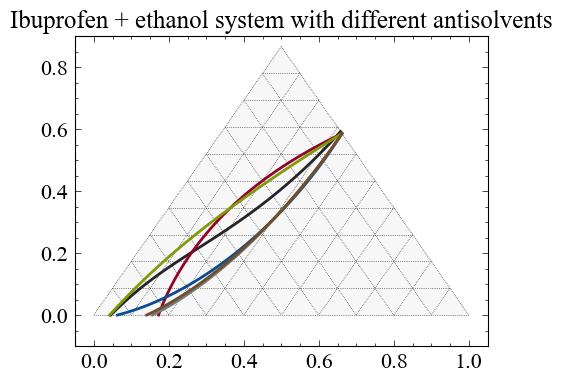

In [24]:
# Plot ternary diagrams

# ibuprofen + ethanol system
ibu_directory = "./data/ibuprofen_calculation"
pattern = "IBUPROFEN_ETHANOL_"

ibu_files = os.listdir(ibu_directory)
ibu_ethanol_files = [filename for filename in ibu_files if re.match(pattern, filename)]

fig1, tax = ternary.figure()
fig1.set_size_inches(5, 4)
plt.grid(False)
tax.gridlines(multiple=0.1)
tax.set_title(f"Ibuprofen + ethanol system with different antisolvents")

for filename in ibu_ethanol_files:
    antisolv_name = filename.split("_")[2].lower()
    filepath = os.path.join(ibu_directory, filename)
    read_cols = [
        "solute_mol_fraction",
        "solvent_mol_fraction",
        "antisolvent_mol_fraction",
    ]
    ternary_data = pandas.read_csv(filepath, usecols=read_cols)
    ternary_data = ternary_data.values
    tax.plot(ternary_data, linewidth=2.0, label=antisolv_name)

In [14]:
# system = tc()
# system.add_solute(**ibuprofen)
# # Test with 1st element of solvent, ethanol
# system.add_solvent(**solvent_data[0])
# # Plot on ternary diagram
# fig1, tax = ternary.figure(scale=1.0)
# tax.boundary()
# tax.gridlines(multiple=0.2)
# tax.set_title(f"solute: {system.mole_name[0]}, solvent: {system.mole_name[1]}")
# for antisolvent in antisolv_data:
#     system.add_antisolvent(**antisolvent)
#     calculator = ac(system, trace=False)
#     tax.plot(calculator.ternary_data, linewidth=2.0, label=f"{system.mole_name[2]}")
#     result = calculator.get_data(
#         export="csv",
#         file_name=f"./data/{system.mole_name[0]}_{system.mole_name[1]}_{system.mole_name[2]}",
#     )
#     system.clear_antisolvent()
# tax.legend(loc="upper right")